In [1]:
from prometheus_client.parser import text_string_to_metric_families
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import math

In [172]:
prometheus_hostname = 'localhost'
prometheus_port = '9090'
target_metric = 'kafka_server_brokertopicmetrics_bytesin_total'

In [187]:
prometheus_query = 'sum({0}) by (topic)'.format(target_metric)
start_time_unix = '1508428908'
end_time_unix = '1508433746'
step = '10s'
query_str = "http://{0}:{1}/api/v1/query_range?query={2}&start={3}&end={4}&step={5}".format(prometheus_hostname,
                    prometheus_port,
                    prometheus_query,
                    start_time_unix,
                    end_time_unix,
                    step)

In [188]:
metrics = requests.get(query_str).content

In [189]:
target_topic = 'test_topic'

#print(metrics)
json_object = json.loads(metrics.decode('utf-8'))
result=json_object['data']['result']
#print(result)
final_data = None
for partial_result in result:
    try:
        if partial_result['metric']['topic'] == target_topic :
             #print(partial_result)
             #print(partial_result['metric']['topic'])
             final_data = pd.DataFrame(data = partial_result['values'],
                          columns = ['Timestamp','value'])
    except KeyError:
        pass



In [190]:
#final_data['value'].apply(pd.to_numeric)

In [191]:
final_data

,Timestamp,value
0,1508428908,12664803
1,1508428918,12799290
2,1508428928,12934253
3,1508428938,13070913
4,1508428948,13205417
5,1508428958,13340866
6,1508428968,13474519
7,1508428978,13607641
8,1508428988,13736369
9,1508428998,13866470


In [192]:
final_data=final_data.astype(float)

In [207]:
final_data.drop(final_data.tail(30).index,inplace=True)

In [208]:
final_data

,Timestamp,value
0,1.508429e+09,12664803.0
1,1.508429e+09,12799290.0
2,1.508429e+09,12934253.0
3,1.508429e+09,13070913.0
4,1.508429e+09,13205417.0
5,1.508429e+09,13340866.0
6,1.508429e+09,13474519.0
7,1.508429e+09,13607641.0
8,1.508429e+09,13736369.0
9,1.508429e+09,13866470.0


In [209]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
final_data.plot('Timestamp','value')

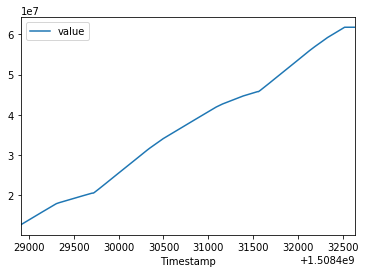

In [210]:
plt.show()

In [211]:
total_bytes_per_sec = final_data.iloc[-1]['value']/(final_data.iloc[-1]['Timestamp']-final_data.iloc[0]['Timestamp'])

In [212]:
total_bytes_per_sec

16562.368096514747

In [213]:
megabytes_per_sec= total_bytes_per_sec/math.pow(10,6)

In [214]:
megabytes_per_sec

0.016562368096514749

In [215]:
total_mbs = final_data.iloc[-1]['value']/math.pow(10,6)

In [216]:
total_mbs

61.777633000000002

In [217]:
65168.834416999998/(8*60*60)

2.262806750590278

In [32]:
final_data

,Timestamp,value
0,1.508435e+09,20240780.0
1,1.508435e+09,20240780.0
2,1.508435e+09,20240780.0
3,1.508435e+09,20240780.0
4,1.508435e+09,20240780.0
5,1.508435e+09,20240780.0
6,1.508435e+09,20240780.0
7,1.508435e+09,20240780.0
8,1.508435e+09,20240780.0
9,1.508435e+09,20240780.0
